In [3]:
import numpy as np
import pandas as pd
import scipy as sp
# import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset

## Database Class

In [ ]:
class RamanData(Dataset):
    def __init__(self, inputURL, outputURL):
        """
        Initialize the dataset.
        
        Args:
            inputURL (str): Path to the .mat file containing the low signal to noise ratio Raman spectra.
            outputURl (str): Path to the .mat file containing the high signal to noise ratio Raman spectra.
        """

        # Load the .mat file
        inputMat = sp.io.loadmat(inputURL, simplify_cells=True)
        outputMat = sp.io.loadmat(outputURL, simplify_cells=True)

        # Extract the key that contains the spectrum data
        inputSpectrumKey = 'Large_Area_Scan_003_SpecData_1_BR_BR_BR_Sub_BG'    # TODO : Change it for the actual data   
        outputSpectrumKey = 'Large_Area_Scan_004_SpecData_1_BR_BR_Sub_BG'   # TODO : change it for the actual data
        dataKey = 'data'
        dataidKey = 'uniqueid'
        axisscaleKey = 'axisscale'
        
        self.inputSpectrum = inputMat[inputSpectrumKey][dataKey]
        self.outputSpectrum = outputMat[outputSpectrumKey][dataKey]
        self.xAxis = inputMat[inputSpectrumKey][axisscaleKey]

        # Normalize the spectra
        self.inputSpectrum = self.inputSpectrum / np.amax(self.inputSpectrum)
        self.outputSpectrum = self.outputSpectrum / np.amax(self.outputSpectrum)

    def __len__(self):
        """Return the size of the dataset."""
        return len(self.inputSpectrum)

    def __getitem__(self, index):
        """
        Get a sample from the dataset.
        
        Args:
            index (int): Index for the data sample.
            
        Returns:
            dict: A dictionary containing the input and output spectra.
        """
        sampleInput = self.inputSpectrum[index]
        sampleOutput = self.outputSpectrum[index]

        sample = {'sampleInput': sampleInput, 'sampleOutput': sampleOutput}
        return sample

    def getStatistics(self, index):
        """
        Return mean, variance, kewness, and kurtosis of the intensity values.

        Args:
            index (int): Index for the data sample.
        """
        sampleInput = self.inputSpectrum[index]
        sampleOutput = self.outputSpectrum[index]

        sampleInputMean = np.mean(sampleInput)
        sampleInputVariance = np.var(sampleInput)
        sampleInputSkewness = sp.stats.skew(sampleInput)
        sampleInputKurtosis = sp.stats.kurtosis(sampleInput)

        sampleOutputMean = np.mean(sampleOutput)
        sampleOutputVariance = np.var(sampleOutput)
        sampleOutputSkewness = sp.stats.skew(sampleOutput)
        sampleOutputKurtosis = sp.stats.kurtosis(sampleOutput)

        return [[sampleInputMean, sampleInputVariance, sampleInputSkewness, sampleInputKurtosis], 
                [sampleOutputMean, sampleOutputVariance, sampleOutputSkewness, sampleOutputKurtosis]]

        
    def plotSample(self, index):
        """
        Plot low and high signal to noise ratio spectrums next to each other

        Args:
            index (int): Index for the data sample.
        """
        sampleInput = self.inputSpectrum[index]
        sampleOutput = self.outputSpectrum[index]
        x_axis = self.xAxis[1][0]

        # Plot the spectra
        plt.figure(figsize=(12, 6))

        # Plot low SNR spectrum
        plt.subplot(1, 2, 1)
        plt.plot(x_axis, sampleInput)
        plt.title(f'Low SNR Spectrum (Index {index})')
        plt.xlabel('Raman Shift')
        plt.ylabel('Intensity')

        # Plot high SNR spectrum
        plt.subplot(1, 2, 2)
        plt.plot(x_axis, sampleOutput)
        plt.title(f'High SNR Spectrum (Index {index})')
        plt.xlabel('Raman Shift')
        plt.ylabel('Intensity')

        # Show the plots
        plt.tight_layout()
        plt.show()
        

## What is our data and how it is stored ?

In [21]:
# Define URLs
testInput_BG_URL = 'Database/Cell_01_In_532_BG.mat'
testInput_URL = 'Database/Cell_01_In_532.mat'
testOutput_BG_URL = 'Database/Cell_01_Out_532_BG.mat'
testOutput_URL = 'Database/Cell_01_Out_532.mat'

# Open .mat files
testInput_BG = sp.io.loadmat(testInput_BG_URL, simplify_cells=True)
testInput = sp.io.loadmat(testInput_URL, simplify_cells=True)
testOutput_BG = sp.io.loadmat(testOutput_BG_URL, simplify_cells=True)
testOutput = sp.io.loadmat(testOutput_URL, simplify_cells=True)

### Keys 

In [22]:
print(testInput_BG.keys())
print(testInput.keys())
print(testOutput_BG.keys())
print(testOutput.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Large_Area_Scan_003_SpecData_1_BR_BR_BR_Sub_BG'])
dict_keys(['__header__', '__version__', '__globals__', 'Large_Area_Scan_003_SpecData_1_BR_BR_BR'])
dict_keys(['__header__', '__version__', '__globals__', 'Large_Area_Scan_004_SpecData_1_BR_BR_Sub_BG'])
dict_keys(['__header__', '__version__', '__globals__', 'Large_Area_Scan_004_SpecData_1_BR_BR'])


In [23]:
testInput_BG['__header__']

b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Sep 02 07:04:02 2019'

In [24]:
testInput_BG['__version__']

'1.0'

### Actual Data

In [25]:
testInput_BG_data = testInput_BG['Large_Area_Scan_003_SpecData_1_BR_BR_BR_Sub_BG']
testInput_data = testInput['Large_Area_Scan_003_SpecData_1_BR_BR_BR']
testOutput_BG_data = testOutput_BG['Large_Area_Scan_004_SpecData_1_BR_BR_Sub_BG']
testOutput_data = testOutput['Large_Area_Scan_004_SpecData_1_BR_BR']

In [28]:
print(testInput_BG_data.keys())
print(testInput_data.keys())
print(testOutput_BG_data.keys())
print(testOutput_data.keys())

dict_keys(['name', 'type', 'author', 'date', 'moddate', 'imagesize', 'imagemode', 'data', 'label', 'axisscale', 'imageaxisscale', 'title', 'class', 'include', 'classlookup', 'axistype', 'imageaxistype', 'description', 'userdata', 'datasetversion', 'history', 'uniqueid'])
dict_keys(['name', 'type', 'author', 'date', 'moddate', 'imagesize', 'imagemode', 'data', 'label', 'axisscale', 'imageaxisscale', 'title', 'class', 'include', 'classlookup', 'axistype', 'imageaxistype', 'description', 'userdata', 'datasetversion', 'history', 'uniqueid'])
dict_keys(['name', 'type', 'author', 'date', 'moddate', 'imagesize', 'imagemode', 'data', 'label', 'axisscale', 'imageaxisscale', 'title', 'class', 'include', 'classlookup', 'axistype', 'imageaxistype', 'description', 'userdata', 'datasetversion', 'history', 'uniqueid'])
dict_keys(['name', 'type', 'author', 'date', 'moddate', 'imagesize', 'imagemode', 'data', 'label', 'axisscale', 'imageaxisscale', 'title', 'class', 'include', 'classlookup', 'axistype'

In [35]:
print(testInput_BG_data['type'] , testInput_BG_data['imagesize'], testInput_BG_data['imagemode'], testInput_BG_data['uniqueid'])

image [50 60] 1 Large_Area_Scan_003_SpecData_1_BR_BR_BR_Sub_BG@unnamed@201992T742


### Some Histogram

In [41]:
x_axis = testInput_BG_data['axisscale'][1][0]

### Noisy Spectrum But Before removing background noise (flourecent)

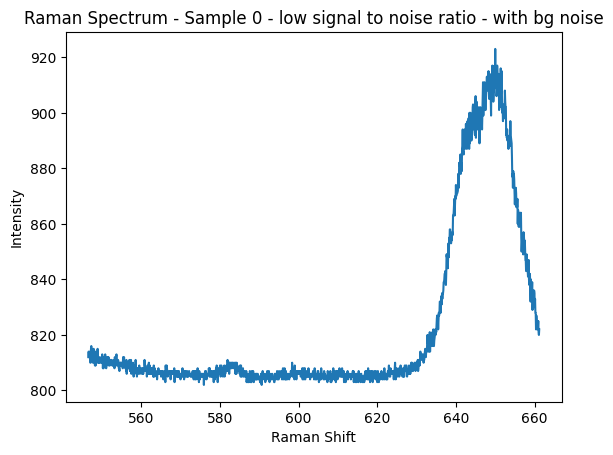

In [49]:
plt.plot(x_axis, testInput_data['data'][0])
plt.title("Raman Spectrum - Sample 0 - low signal to noise ratio - with bg noise")
plt.xlabel("Raman Shift")
plt.ylabel("Intensity")
plt.show()

### Noisy Spectrum But after removing background noise

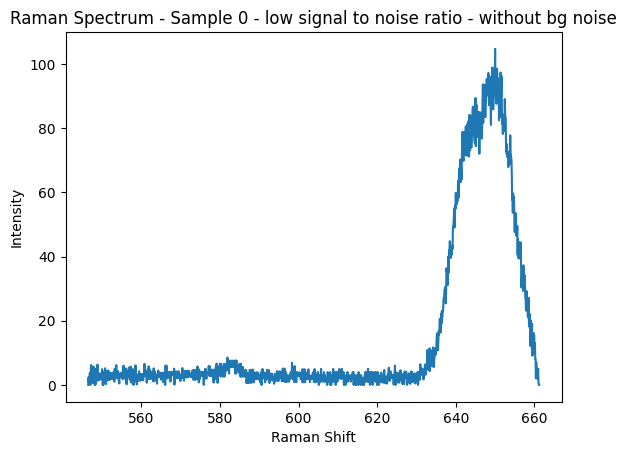

In [50]:
plt.plot(x_axis, testInput_BG_data['data'][0])
plt.title("Raman Spectrum - Sample 0 - low signal to noise ratio - without bg noise")
plt.xlabel("Raman Shift")
plt.ylabel("Intensity")
plt.show()

### TODO: Add function for normalization in RamanData Class

### Clean Spectrum But before removing background noise

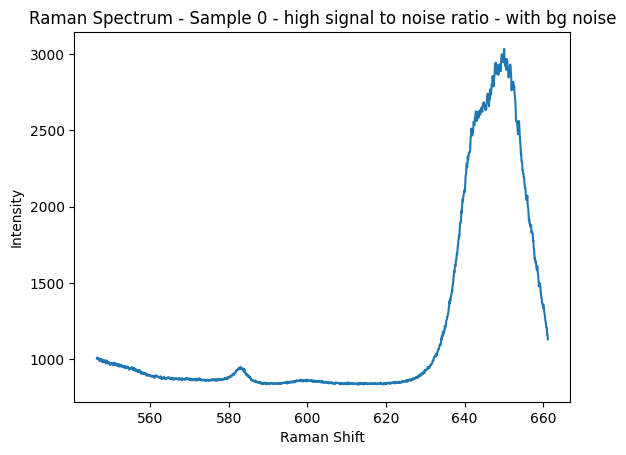

In [51]:
plt.plot(x_axis, testOutput_data['data'][0])
plt.title("Raman Spectrum - Sample 0 - high signal to noise ratio - with bg noise")
plt.xlabel("Raman Shift")
plt.ylabel("Intensity")
plt.show()

### Clean Spectrum But after removing background noise

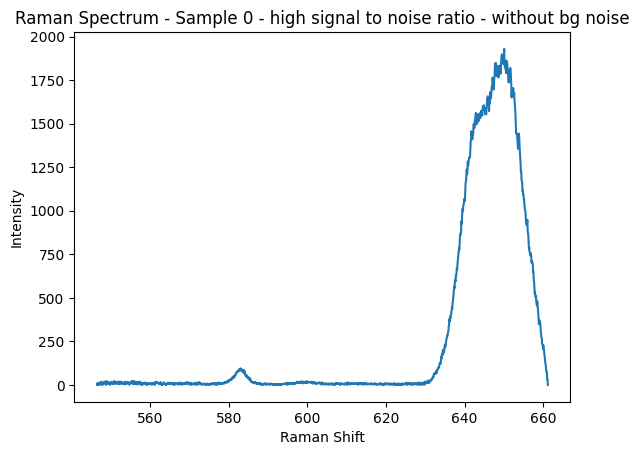

In [52]:
plt.plot(x_axis, testOutput_BG_data['data'][0])
plt.title("Raman Spectrum - Sample 0 - high signal to noise ratio - without bg noise")
plt.xlabel("Raman Shift")
plt.ylabel("Intensity")
plt.show()

### A comparison (What is our data and what we want to have)

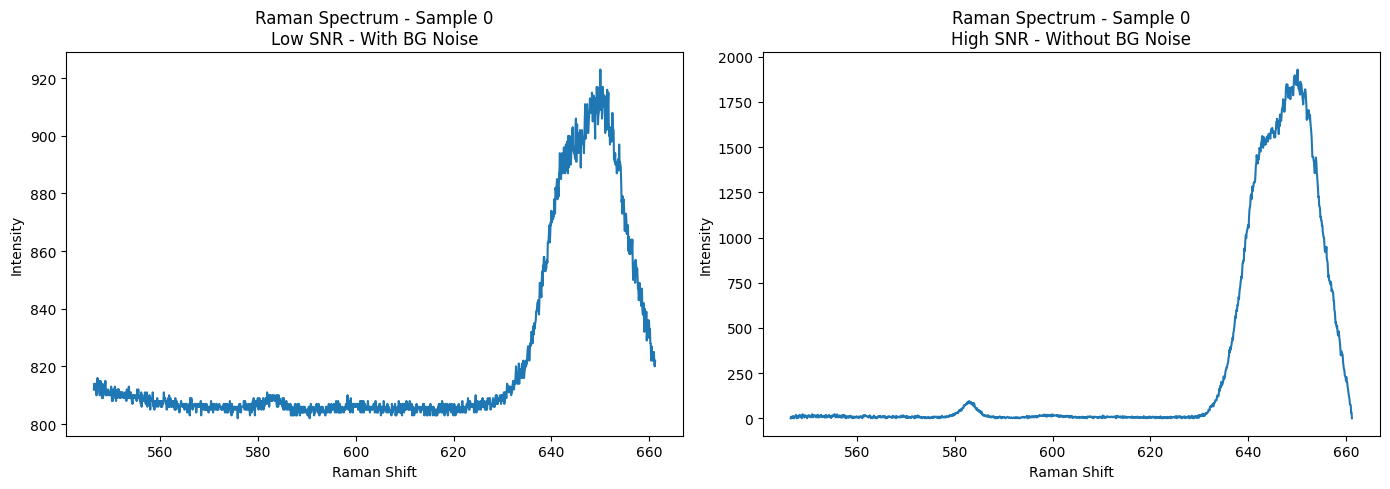

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# Plot 1 - with background noise
axes[0].plot(x_axis, testInput_data['data'][0])
axes[0].set_title("Raman Spectrum - Sample 0\nLow SNR - With BG Noise")
axes[0].set_xlabel("Raman Shift")
axes[0].set_ylabel("Intensity")

# Plot 2 - without background noise
axes[1].plot(x_axis, testOutput_BG_data['data'][0])
axes[1].set_title("Raman Spectrum - Sample 0\nHigh SNR - Without BG Noise")
axes[1].set_xlabel("Raman Shift")
axes[1].set_ylabel("Intensity")

plt.tight_layout()
plt.show()